# **Big Mart Sales Analysis and Exploration**

## **Problem statement:** 
#### The Data Analytics at BigMart have acquired sales data over a period from 1985 to 2009 for 1559 products, which have been categorized into 16 product types across 10 stores in various locations. Also, certain attributes of each product and store have been defined.
#### The aim is to find out the properties of a product, and the store which impacts the sales and its visibility.

### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### **Importing Data**

In [3]:
data = pd.read_csv('bigmartsales.csv')

In [4]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.930,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4,OUT018,2009,Medium,Tier 2,Supermarket Type2,556.6088,9.5
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.7,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,8.8
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.8,OUT027,1985,Medium,Tier 2,Supermarket Type3,4022.7636,13.3
8,FDH17,16.200,Regular,0.016687,Frozen Foods,97.0,OUT045,2002,NaN,NaN,Supermarket Type1,1076.5986,13.0
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8,OUT017,2007,NaN,--,Supermarket Type1,4710.5350,13.6


In [5]:
data.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
8513,FDH31,12.000,Regular,0.020407,Meat,99.9,OUT035,2004,Small,Tier1,Supermarket Type1,595.2252,13.5
8514,FDA01,15.000,Regular,0.054489,Canned,57.6,OUT045,2002,NaN,NaN,Supermarket Type1,468.7232,14.0
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5,OUT018,2009,Medium,Tier 2,Supermarket Type2,1571.2880,14.2
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.8,OUT018,2009,Medium,Tier 2,Supermarket Type2,858.8820,14.6
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8,OUT046,1997,Small,Tier1,Supermarket Type1,3608.6360,13.2
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,14.1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.2,OUT045,2002,NaN,NaN,Supermarket Type1,549.2850,14.2
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1,OUT035,2004,Small,Tier1,Supermarket Type1,1193.1136,9.5
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1,OUT018,2009,Medium,Tier 2,Supermarket Type2,1845.5976,14.2
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.5,OUT046,1997,Small,Tier1,Supermarket Type1,765.6700,14.6


### **Preprocessing Data**

In [6]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Profit                       float64
dtype: object

In [7]:
data.shape

(8523, 13)

In [8]:
#statistical info
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,5.776851,0.051598,62.258099,8.371760,1706.499616,1.701840
min,0.000000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,2009.000000,13086.964800,24.000000


In [9]:
# check for null values
data.isnull().sum()
#data.apply(lambda x: sum(x.isnull())) ## alternate

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

#### **Observations:**

1. **Item_Visibility** has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

2. **Outlet_Establishment_Years** vary from 1985 to 2009.

3. The lower ‘count’ of **Item_Weight**, **Outlet_Size** and **Outlet_Location_Type** confirms the findings from the missing value check.

In [10]:
#datatype of attributes
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [11]:
#check for unique values in the data set
dataitem_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier').apply(lambda x: len(x.unique()))
dataitem_avg_weight

Item_Weight    841
dtype: int64

#### **Observations:**

1. There are **1559 products** - This is too many to be useful, we need to see how we can categorise them into a smaller number of groups
2. There are **10 stores**.
3. Since the Item_MRP is bigger than the number of products, this could mean that in different stores, the MRP could be different.
4. There are only **16 Item_Type**.

In [12]:
# Check for categorical attributes
categorical_cols = [x for x in data.dtypes.index if (data.dtypes[x] == 'object')]
categorical_cols.remove('Item_Identifier')
categorical_cols.remove('Outlet_Identifier')
categorical_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

### **Columns in the data set**

<b>Item_Identifier :</b> Unique product ID

<b>Item_Weight:</b>  Weight of product

<b>Item_Fat_Content :</b> Whether the product is low fat or not

<b>Item_Visibility :</b> The % of total display area of all products in a store allocated to the particular product

<b>Item_Type :</b> The category to which the product belongs

<b>Item_MRP :</b> Maximum Retail Price (list price) of the product

<b>Outlet_Identifier :</b> Unique store ID

<b>Outlet_Establishment_Year :</b> The year in which store was established

<b>Outlet_Size :</b> The size of the store in terms of ground area covered

<b>Outlet_Location_Type :</b> The type of city in which the store is located

<b>Outlet_Type :</b> Whether the outlet is just a grocery store or some sort of supermarket

<b>Item_Outlet_Sales :</b> Sales of the product in the particular store.

In [13]:
#Check the frequencies of categories [column - column value count]
for col in categorical_cols:
    print(f'\nFreqfuency of Categories for variable {col}')
    print(data[col].value_counts())


Freqfuency of Categories for variable Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Freqfuency of Categories for variable Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Freqfuency of Categories for variable Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Freqfuency of Categories for variable Outlet_Location_Type
Tier 2    2793
Tier1     2388
Tier 3     932
?          120
  --       109
  -  

In [14]:
#Replace the following unintelligible categories with np.nan
data.replace({"?": np.nan, "  --": np.nan, "na": np.nan, "NAN": np.nan, "  -": np.nan}, inplace = True)
print(data.isna().sum())

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2410
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64


**Updated Observations:**
1. Missing Values:
    1. There are 749 missing values in Item_Weight column
    2. There are 2410 missing values in Outlet_Size column
    3. There are 2410 missing values in Outlet_Location_Type column

2. Low Fat, low fat and LF are all Low Fat; reg and Regular are both Regular.
3. Maybe combine some of the categories in Outlet_Type -> check the mean sales by type of outlet.
4. Stores with Outlet_Identifier OUT010 and OUT019 have significantly smaller number of sales.

#### **Observations on Missing Values**
1. The min value of Item_Visibility is 0, but this can not be as every item must have some visibility.
2. Low Fat, low fat and LF are all Low Fat; reg and Regular are both Regular.
3. Null values applicable for cleaning -  Item_Weight, Outlet_Size, Outlet_Location_Type

#### **Observations on Data Analysis to be done**
1. There are 10 stores.
2. Since the Item_MRP is bigger than the number of products, this could mean that in different stores, the MRP could be different.
3. There are only 16 Item_Type.
4. Stores with Outlet_Identifier OUT010 and OUT019 have significantly smaller number of sales.**??**

#### **Observations on Feature engineering to be done**
1. There are 1559 products - This is too many to be useful, we need to see how we can categorise them into a smaller number of groups
3. Maybe combine some of the categories in Outlet_Type -> check the mean sales by type of outlet.

### **Data Cleaning and Imputing Missing Values**
#### **Item_Weight**

In [15]:
print(f'Missing values: {sum(data["Item_Weight"].isnull())}')

data['Item_Weight'].fillna(value=data['Item_Weight'].mean(), inplace=True)
print(f'Missing values after immputation {sum(data["Item_Weight"].isnull())}')

Missing values: 749
Missing values after immputation 0


#### **Outlet_Size**

In [16]:
print(f'Missing Outlet Size values {sum(data["Outlet_Size"].isnull())}')

data['Outlet_Size'].fillna(method="ffill",inplace = True)
print(f'Missing Outlet Size values after immputation {sum(data["Outlet_Size"].isnull())}')

Missing Outlet Size values 2410
Missing Outlet Size values after immputation 0


#### **Outlet_Location_Type**

In [17]:
print(f'Missing Outlet Location Types values {sum(data["Outlet_Location_Type"].isnull())}')

data['Outlet_Location_Type'].fillna(method="ffill",inplace = True)
print(f'Missing Outlet Location Types values after immputation {sum(data["Outlet_Location_Type"].isnull())}')

Missing Outlet Location Types values 2410
Missing Outlet Location Types values after immputation 0


In [18]:
# check for null values
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Profit                       0
dtype: int64

#### **Combine Low Fat, low fat and LF to Low Fat and reg and Regular to Regular**

In [19]:
#Existing Fat Content Categories
print(data['Item_Fat_Content'].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


#### **Modified Item Fat and Regular**

In [20]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
print(data['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


#### **Modifying Item_Visibility**


In [21]:
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (data['Item_Visibility'] == 0)

print ('Number of 0 values: %d'%sum(missing_values))
data.loc[missing_values,'Item_Visibility'] = data.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values: 526
Number of 0 values after modification: 0


In [22]:
data.to_csv('updated_BigMartSales.csv')

# data.to_csv('updated_BigMartSales.csv')
# from google.colab import files
# files.download("updated_BigMartSales.csv")

## **Visualization**

### **Univariate**

#### **1. How many Identifers do we have per Outlet?**

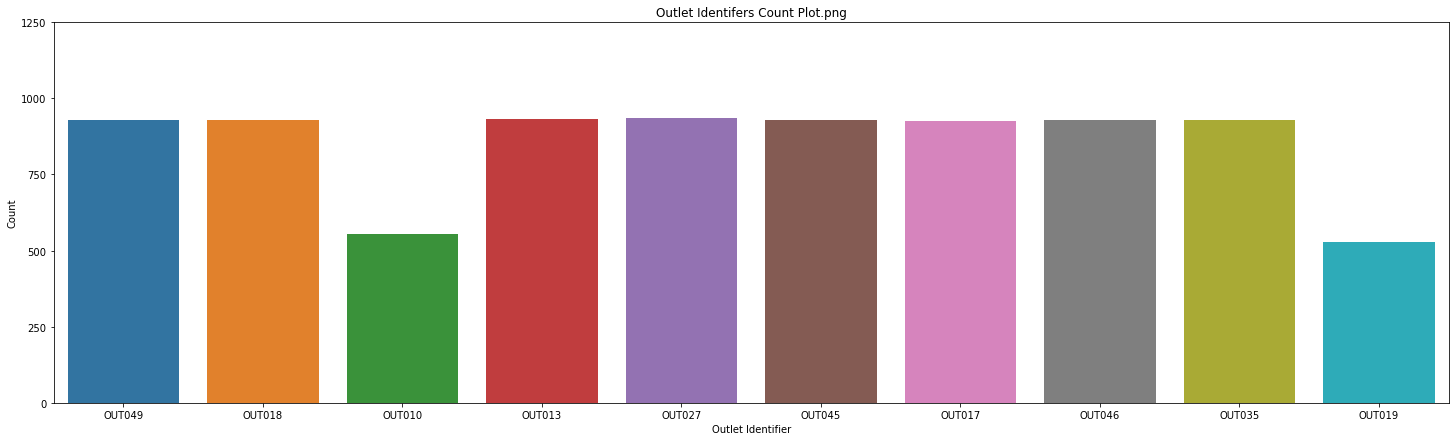

In [23]:
plt.figure(figsize=(25,7))
y = sb.countplot('Outlet_Identifier',data=data) #,palette='spring'
y.set_yticks(np.arange(0,1500,250))
plt.xlabel('Outlet Identifier')
plt.ylabel('Count')
plt.title('Outlet Identifers Count Plot.png')
plt.savefig('Outlet Identifers Count Plot.png')
plt.show()

#### **2. How many Outlets we have based on capacity**

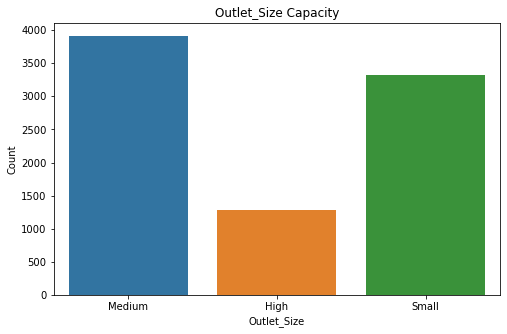

In [24]:
plt.figure(figsize=(8,5))
sb.countplot('Outlet_Size',data=data)
plt.xlabel('Outlet_Size')
plt.ylabel('Count')
plt.title('Outlet_Size Capacity')
plt.savefig('Outlet_Size.png')
plt.show()

#### **3. What is the most frequent Item type being sold?**

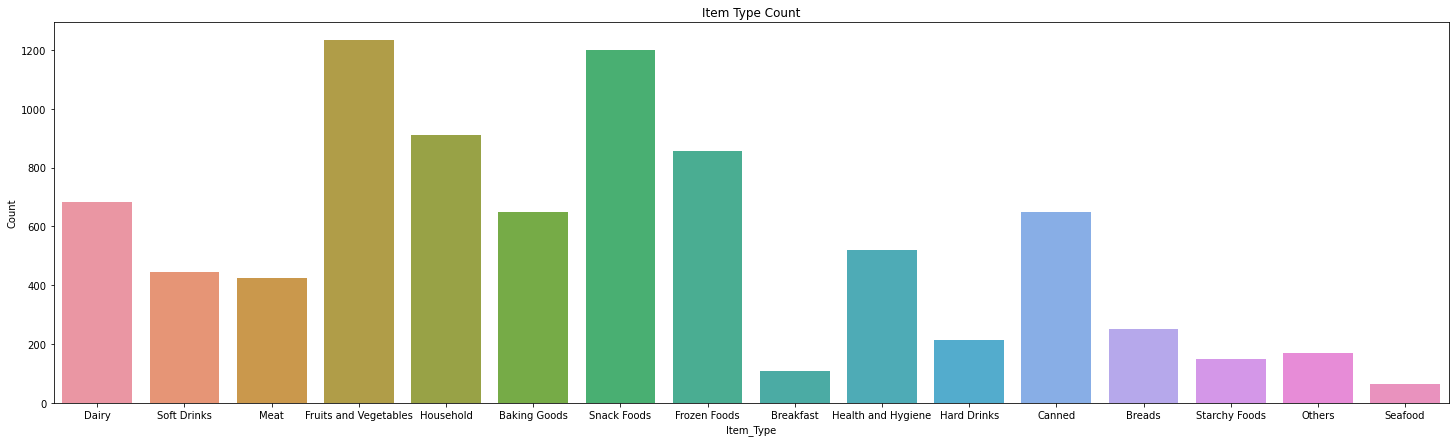

In [25]:
plt.figure(figsize=(25,7))
sb.countplot('Item_Type',data=data)
plt.xlabel('Item_Type')
plt.ylabel('Count')
plt.title('Item Type Count')
plt.savefig('Item_Type.png')
plt.show()

#### **4. What is the distribution of numerical data?**

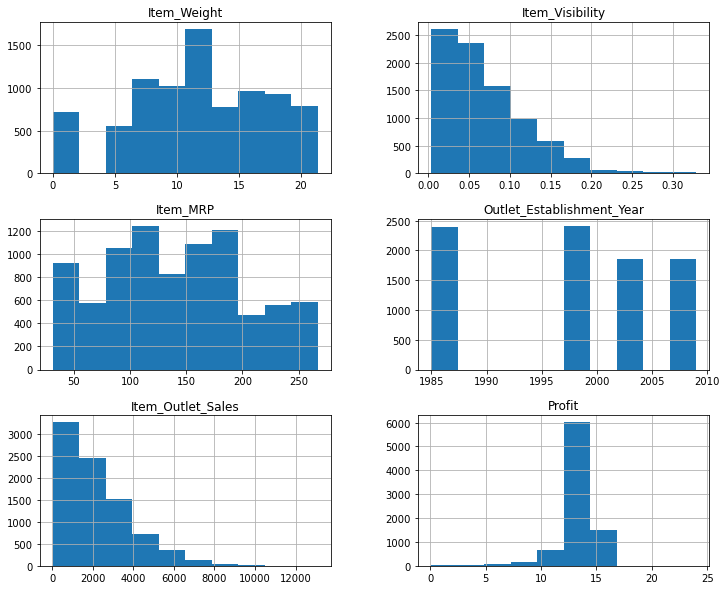

In [26]:
data.hist(figsize=(12,10))
plt.savefig('HistOverall.png')
plt.show()

### **Bivariate**
#### **1.How has the Sales varied over the years?**

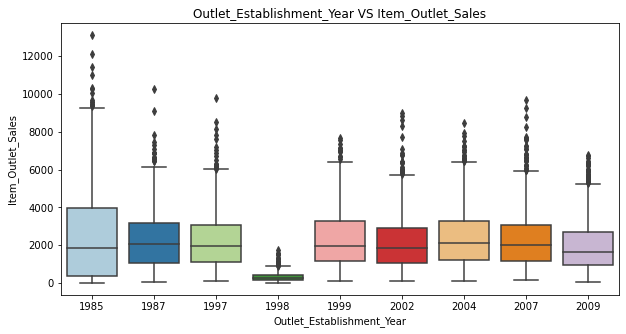

In [27]:
plt.figure(figsize=(10,5))
sb.boxplot('Outlet_Establishment_Year','Item_Outlet_Sales',data=data,palette="Paired")
plt.title('Outlet_Establishment_Year VS Item_Outlet_Sales')
plt.savefig('Outlet_Establishment_YearVSItem_Outlet_Sales.png')
plt.show()

#### **2. What is the impact of item visibility on item outlet sale?**

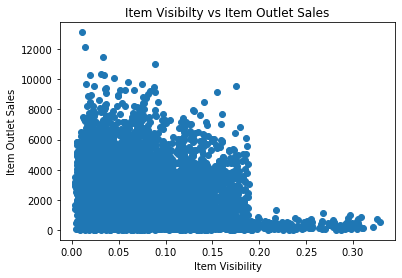

In [28]:
plt.scatter(data.Item_Visibility , data.Item_Outlet_Sales)
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.title('Item Visibilty vs Item Outlet Sales')
plt.savefig('Item_VisibiltyVSItem_Outlet Sales.png')
plt.show()

Less visible items are sold more compared to more visibility items as outlet contains daily used items which contradicts the null hypothesis.
Visibility has no impact on Item Outlet Sales

#### **3. What are the Outlet sales per Item category?**

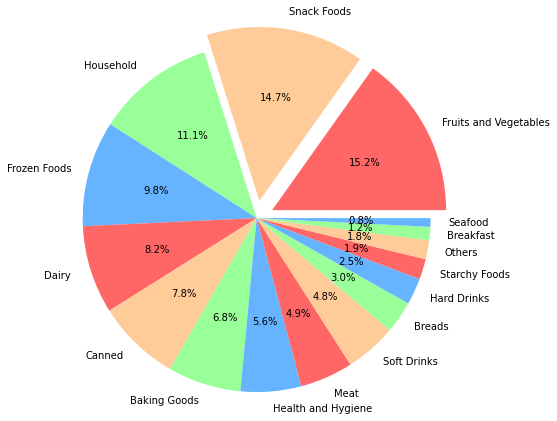

In [29]:
df3=data.groupby(by='Item_Type').sum()
df2=df3['Item_Outlet_Sales'].sort_values(ascending=False)
label = ['Fruits and Vegetables', 'Snack Foods','Household ','Frozen Foods','Dairy ', 'Canned','Baking Goods','Health and Hygiene','Meat', 'Soft Drinks','Breads','Hard Drinks','Starchy Foods', 'Others','Breakfast','Seafood']
plt.rcParams['font.size'] = 10
plt.pie(df2, autopct = '%0.1f%%', radius = 2, labels = label,
      explode = [0.2,0.2,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0],colors=['#ff6666', '#ffcc99', '#99ff99', '#66b3ff'])
plt.savefig('Outlet_Sales per Item_Type.png', bbox_inches='tight')
plt.show()

#### **4. How has the Item Type affected overall Profit?**

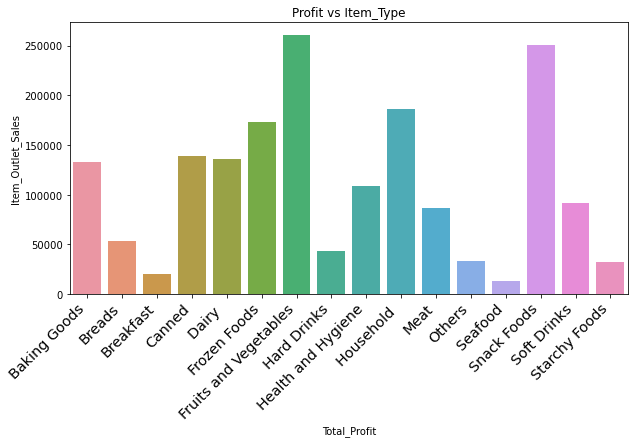

In [30]:
data["Total_Profit"] = (data['Item_Outlet_Sales']/data['Item_MRP']) * data['Profit']
type6=data.groupby(by='Item_Type')['Total_Profit'].sum()
plt.figure(figsize = (10,5))
lab = ['Fruits and Vegetables', 'Snack Foods','Household ','Frozen Foods','Dairy ', 'Canned','Baking Goods','Health and Hygiene','Meat', 'Soft Drinks','Breads','Hard Drinks','Starchy Foods', 'Others','Breakfast','Seafood']
lab.sort()
chart = sb.barplot(x = lab, y = type6)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light',fontsize='x-large')
plt.xlabel('Total_Profit')
plt.ylabel('Item_Outlet_Sales')
plt.title('Profit vs Item_Type')
plt.savefig('Profit vs Item_Type.png', bbox_inches='tight')
plt.show()

#### **5. What is the total Profit over different Outlet locations?**

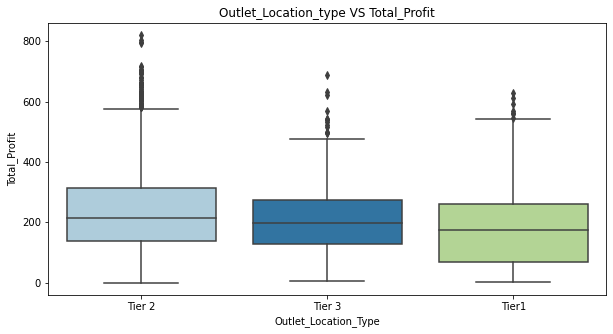

In [31]:
plt.figure(figsize=(10,5))
data["Total_Profit"] = (data['Item_Outlet_Sales']/data['Item_MRP']) * data['Profit']
sb.boxplot('Outlet_Location_Type','Total_Profit',data=data,palette="Paired")
plt.title('Outlet_Location_type VS Total_Profit')
plt.savefig('Outlet_Location_typeVSTotal_Profit.png')
plt.show()

#### **6. How are the sales per type of outlet?**

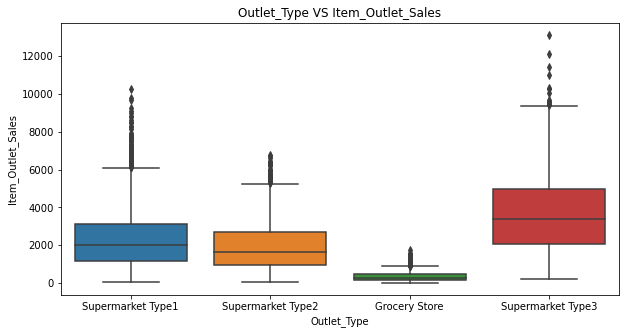

In [32]:
plt.figure(figsize=(10,5))
sb.boxplot('Outlet_Type','Item_Outlet_Sales',data=data)
plt.title('Outlet_Type VS Item_Outlet_Sales')
plt.savefig('Outlet_TypeVSItem_Outlet_Sales.png')
plt.show()